# Preparation

In [1]:
import pandas as pd              
import numpy as np               
from datetime import datetime
from scipy.stats import trim_mean, kurtosis, skew, boxcox, yeojohnson      
from math import sqrt
import matplotlib                
import matplotlib.pyplot as plt  
from pandas.plotting import parallel_coordinates
import seaborn as sns            
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For machine learning

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score,
                             f1_score, confusion_matrix, classification_report)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import optuna

### Load datasets

In [3]:
df_train = pd.read_csv('/kaggle/input/academic-dataset/train.csv')
df_test = pd.read_csv('/kaggle/input/academic-dataset/test.csv')

# Clean column names right away
df_train.columns = df_train.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.replace(' ', '_')


# EDA

In [4]:
df_train.head()

,id,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
df_train.describe()

,id,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,...,Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital_status                                  76518 non-null  int64  
 2   Application_mode                                76518 non-null  int64  
 3   Application_order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening_attendance                      76518 non-null  int64  
 6   Previous_qualification                          76518 non-null  int64  
 7   Previous_qualification_(grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's_qualification                 

**Observations**
* Train data has 76,518 rows x 38 columns (37 features & 1 target)
* DDataset includes predictors in numerical format (int64 and float64).


# Visualization

### Univariate Analysis

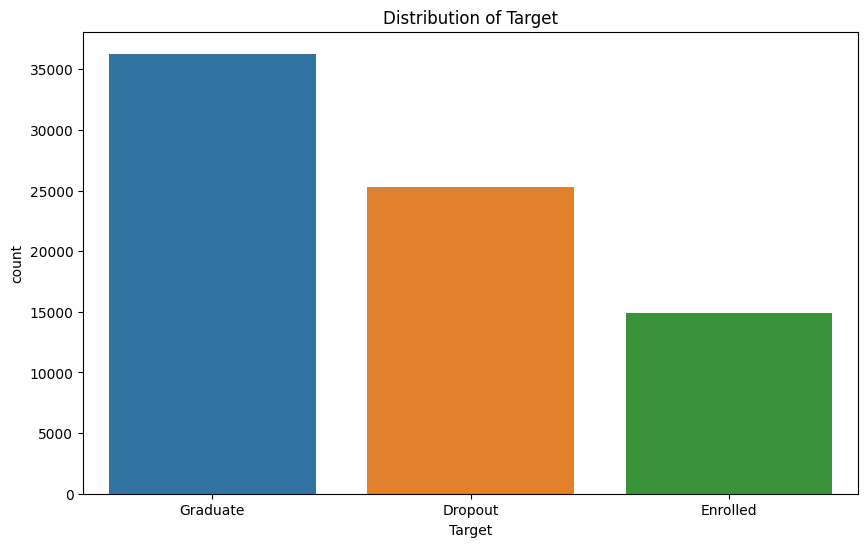

In [7]:
fig, ax = plt.subplots(figsize= (10,6))

ax = sns.countplot(
    data = df_train,
    x = 'Target',
)
ax.set_title('Distribution of Target')
plt.show()

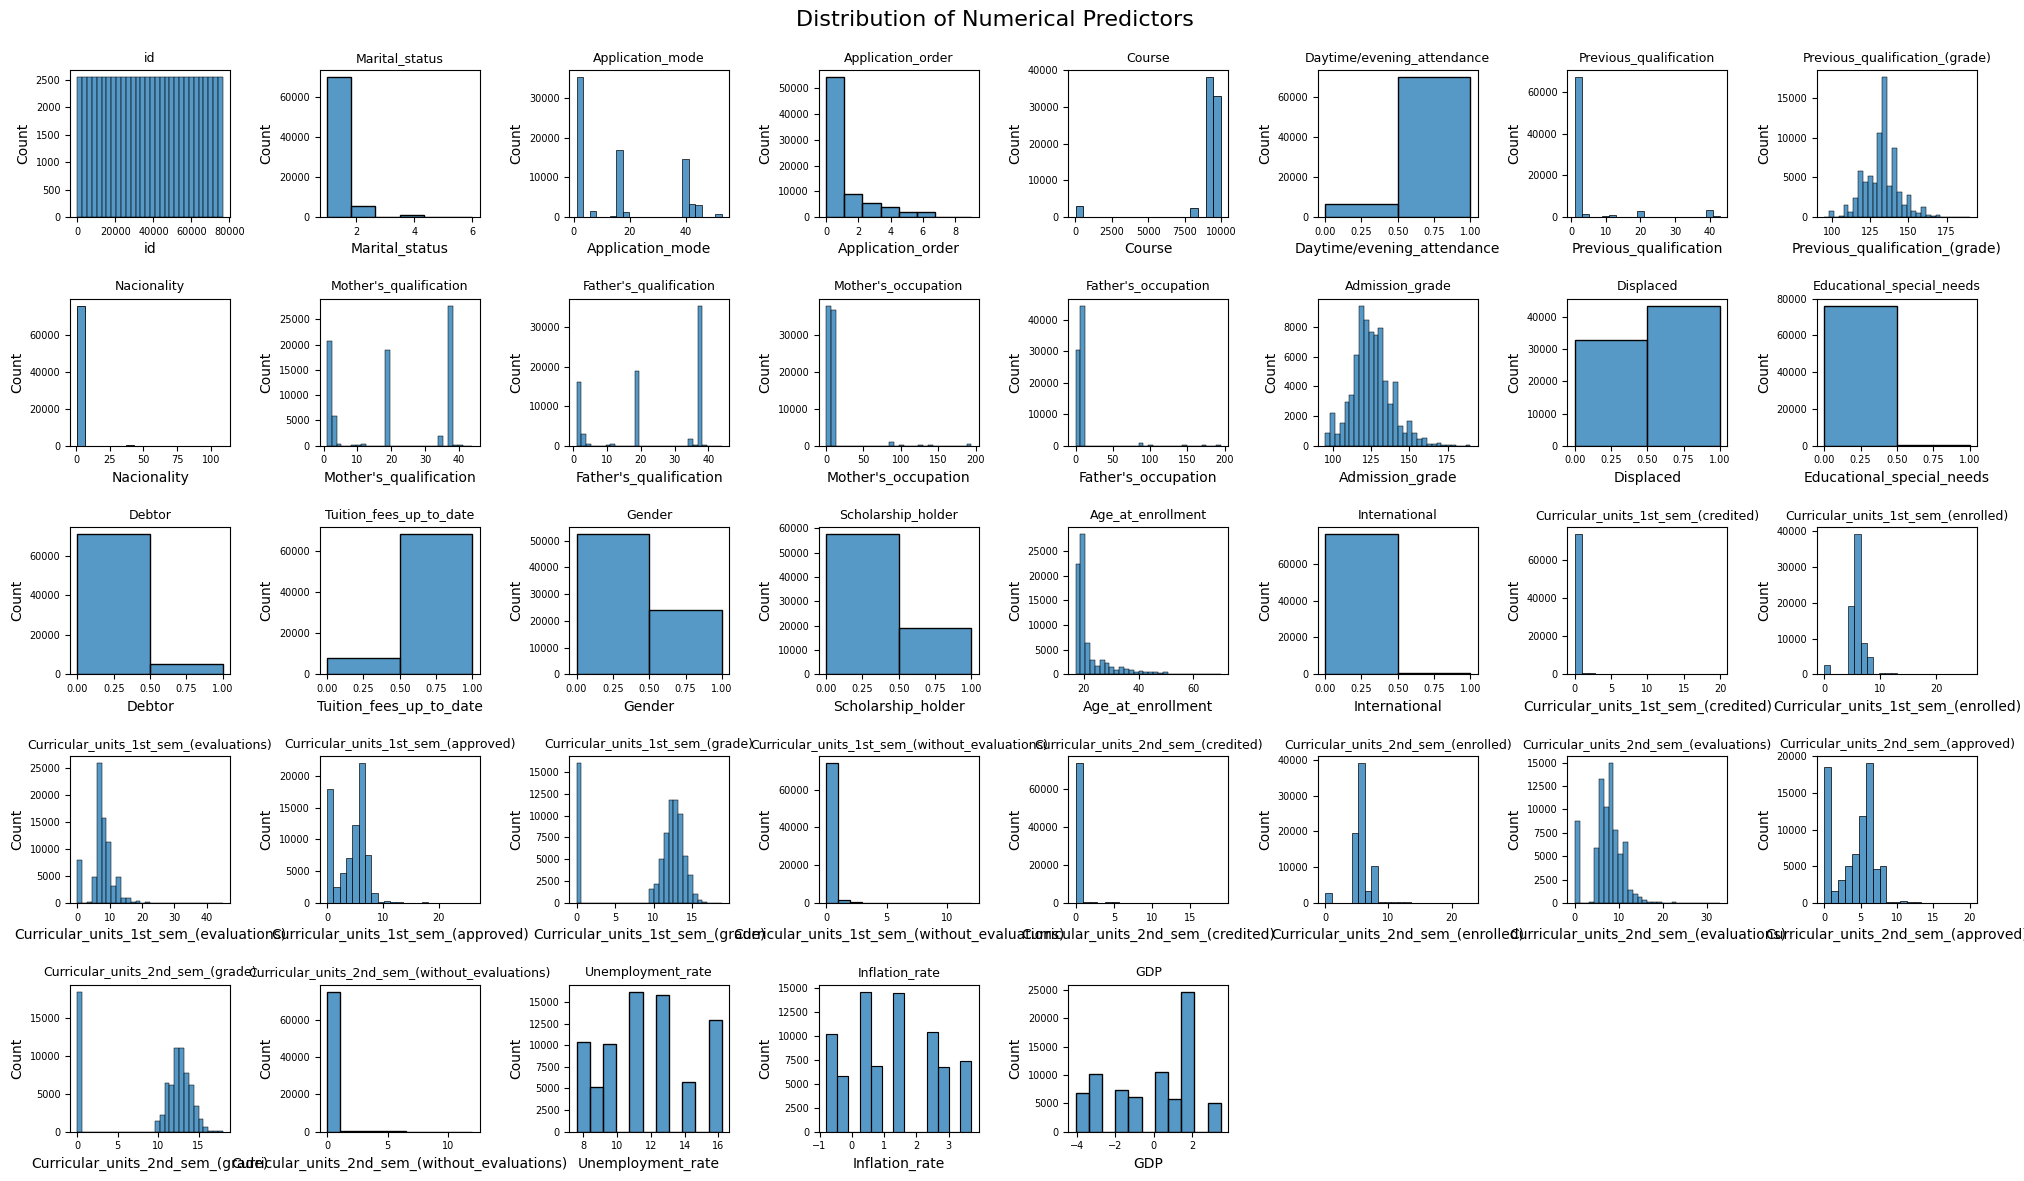

In [8]:
plot_columns = [col for col in df_train.columns if col != 'Target']

fig, axes = plt.subplots(5, 8, figsize=(20, 12))
axes = axes.flatten()  

for i, column in enumerate(plot_columns):
    sns.histplot(
        data=df_train,
        x=column,
        bins=min(df_train[column].nunique(), 30),  # cap bin count
        ax=axes[i]
    )
    axes[i].set_title(column, fontsize=9)
    axes[i].tick_params(labelsize=7)

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.93)
plt.suptitle('Distribution of Numerical Predictors', fontsize=16)
plt.show()

### Multivariate Analysis

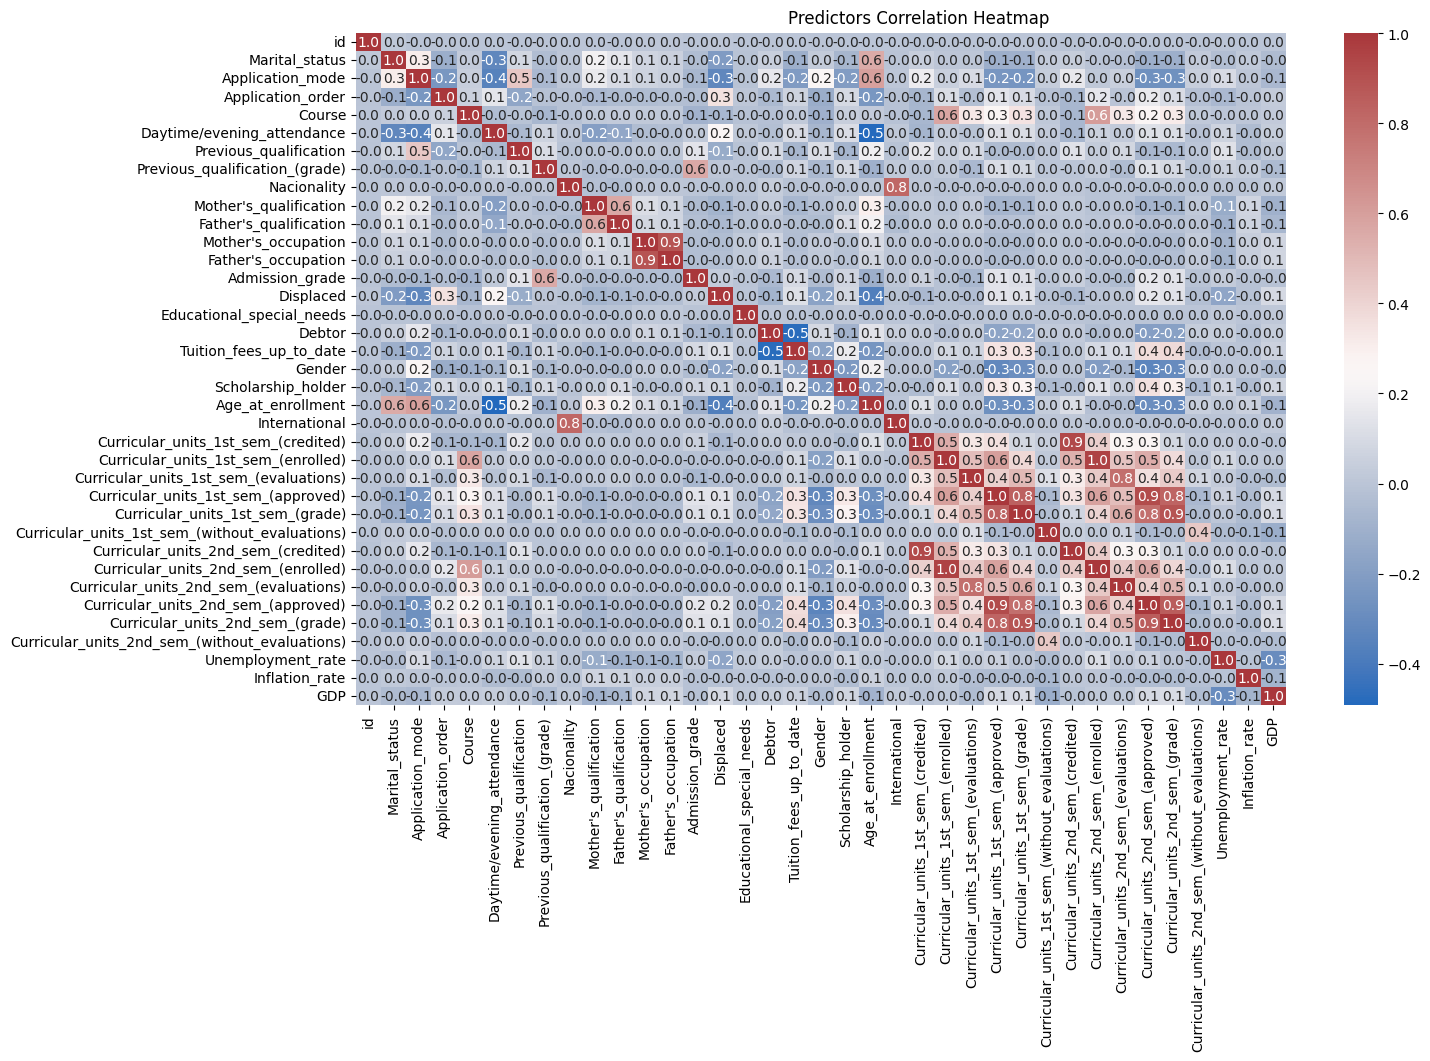

In [9]:
df_features = df_train.select_dtypes(include='number')
corr = df_features.corr()
fig, ax= plt.subplots(figsize = (15,8))
hm = sns.heatmap(
    corr, 
    annot=True,
    ax=ax,
    cmap=sns.color_palette('vlag', as_cmap=True),
    fmt='.1f'
)

fig.subplots_adjust(top=0.95)
plt.suptitle('Predictors Correlation Heatmap')
plt.show()

# Preprocessing

### Train/Test Split

In [10]:
X = df_train.drop(columns = 'Target', axis = 1)
y = df_train['Target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Label Encoder

In [11]:
le = LabelEncoder()
# Convert the target variable 'Target' to numerical data
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)

In [12]:
# Define
cat_cols = [col for col in X.columns if X[col].nunique() <= 8]
num_cols = [col for col in X.columns if X[col].nunique() >= 9]

In [13]:
# Define the preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'),cat_cols)
    ]
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
df_test_processed = preprocessor.transform(df_test)

# Convert processed arrays back to DataFrame
X_train_processed = pd.DataFrame(X_train_processed, columns = preprocessor.get_feature_names_out())
X_valid_processed = pd.DataFrame(X_valid_processed, columns = preprocessor.get_feature_names_out())
df_test_processed = pd.DataFrame(df_test_processed, columns = preprocessor.get_feature_names_out())

# Keep dataframe names consistent
X_train = X_train_processed
X_valid = X_valid_processed
df_test = df_test_processed

# Modeling & Hyperparameter Tuning

### Random Forest

In [14]:
#def objective(trial):
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#        'max_depth': trial.suggest_int('max_depth', 5, 30),
#        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
#        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#        'random_state': 42,
#    }
#
#    model = RandomForestClassifier(**params)
#
#    # 5-fold stratified cross-validation
#    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_macro', n_jobs=-1)
#
#    return scores.mean()
#
## Run Optuna optimization
#study = optuna.create_study(direction='maximize', study_name='RandomForest_Optimization')
#study.optimize(objective, n_trials=50, show_progress_bar=True)
#
## Best results
#best_params = study.best_params
#print("Best Hyperparameters:", best_params)
#print("Best CV f1_macro:", study.best_value)

Best Hyperparameters: {'n_estimators': 435, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 0.20704043560018662, 'bootstrap': False}
Best CV f1_macro: 0.7878374847059837

In [15]:
rf = RandomForestClassifier(
    n_estimators = 435,
    max_depth = 20,
    min_samples_split = 17,
    min_samples_leaf = 4,
    max_features = 0.20704043560018662,
    bootstrap = False,
    random_state = 42
)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'accuracy')

# Print CV scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the model on the full training data
rf.fit(X_train, y_train)

# Predict on validation data
y_pred = rf.predict(X_valid)

# Calculate accurcay on validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy on Validation Data:", accuracy)

Cross-Validation Scores: [0.83100547 0.82512456 0.82210243 0.82479784 0.82707074]
Mean CV Score: 0.8260202086210908
Accuracy on Validation Data: 0.8274307370622059


### XGBoost

In [16]:
#def objective(trial):
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#        'max_depth': trial.suggest_int('max_depth', 3, 15),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#        'gamma': trial.suggest_float('gamma', 0, 5),
#        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
#        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
#        'random_state': 42,
#        'use_label_encoder': False,
#        'eval_metric': 'mlogloss'
#    }
#
#    model = XGBClassifier(**params, n_jobs=-1)
#
#    # 5-fold stratified cross-validation
#    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_macro', n_jobs=-1)
#
#    return scores.mean()
#
## Run Optuna optimization
#study = optuna.create_study(direction='maximize', study_name='XGBoost_Optimization')
#study.optimize(objective, n_trials=50, show_progress_bar=True)
#
## Show results
#best_params = study.best_params
#print("Best Hyperparameters (XGBoost):", best_params)
#print("Best CV f1_macro:", study.best_value)

Best Hyperparameters (XGBoost): {'n_estimators': 529, 'max_depth': 3, 'learning_rate': 0.21813997313117633, 'subsample': 0.8252103659497152, 'colsample_bytree': 0.506504557968108, 'gamma': 0.35109304972948685, 'reg_alpha': 4.656042818100389, 'reg_lambda': 3.3655750895628733}
Best CV f1_macro: 0.794529979125461

In [17]:
xgb = XGBClassifier(
    n_estimators = 529,
    max_depth = 3,
    learning_rate = 0.21813997313117633,
    subsample = 0.8252103659497152,
    colsample_bytree = 0.506504557968108,
    gamma = 0.35109304972948685,
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv = 5, scoring = 'accuracy')

# Print CV scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the model on the full training data
xgb.fit(X_train, y_train)

# Predict on validation data
y_pred = xgb.predict(X_valid)

# Calculate accuracy on validation data
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy on Validation Data:', accuracy)

Cross-Validation Scores: [0.83402761 0.82880013 0.82528792 0.82749326 0.83319719]
Mean CV Score: 0.8297612218768275
Accuracy on Validation Data: 0.8348144276006273


### Cat Boosting

In [18]:
#cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].nunique() <= 8 and X_train[col].dtype == 'int64']
#
## Define Optuna objective
#def objective(trial):
#    params = {
#        'boosting_type': 'Plain',
#        'bootstrap_type': 'Bernoulli',
#        'random_strength': 1.0,
#        'max_bin': trial.suggest_int('max_bin', 100, 512),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#        'depth': trial.suggest_int('depth', 3, 10),
#        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
#        'iterations': trial.suggest_int('iterations', 200, 1000),
#        'eval_metric': 'Accuracy',
#        'verbose': False,
#        'task_type': 'CPU',
#        'random_seed': 42
#    }
#
#    train_pool = Pool(X_train, y_train, cat_features=cat_features)
#    val_pool = Pool(X_valid, y_valid, cat_features=cat_features)
#
#    model = CatBoostClassifier(**params)
#    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50, verbose=False)
#
#    preds = model.predict(X_valid)
#    return accuracy_score(y_valid, preds)
#
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=30)
#
## Show best parameters
#print("Best params:", study.best_params)
#print("Best accuracy:", study.best_value)

Best params: {'max_bin': 365, 'learning_rate': 0.09186353850092592, 'depth': 10, 'l2_leaf_reg': 8.249722543845271, 'iterations': 440}
Best accuracy: 0.8346184004181914

In [19]:
# Create CatBoost model
catb = CatBoostClassifier(
    iterations=440,
    depth=10,
    learning_rate=0.09186353850092592,
    l2_leaf_reg=8.249722543845271,
    max_bin=365,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    random_state=42,
    verbose=0
)

# Perform cross-validation
cv_scores = cross_val_score(catb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the model on the full training data
catb.fit(X_train, y_train)

# Predict on validation data
y_pred = catb.predict(X_valid)

# Calculate accuracy on validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy on Validation Data:", accuracy)

Cross-Validation Scores: [0.83361921 0.82610471 0.82316426 0.82798334 0.83099167]
Mean CV Score: 0.8283726372893575
Accuracy on Validation Data: 0.8323314166231051


# Importance Feature

### Random Forest

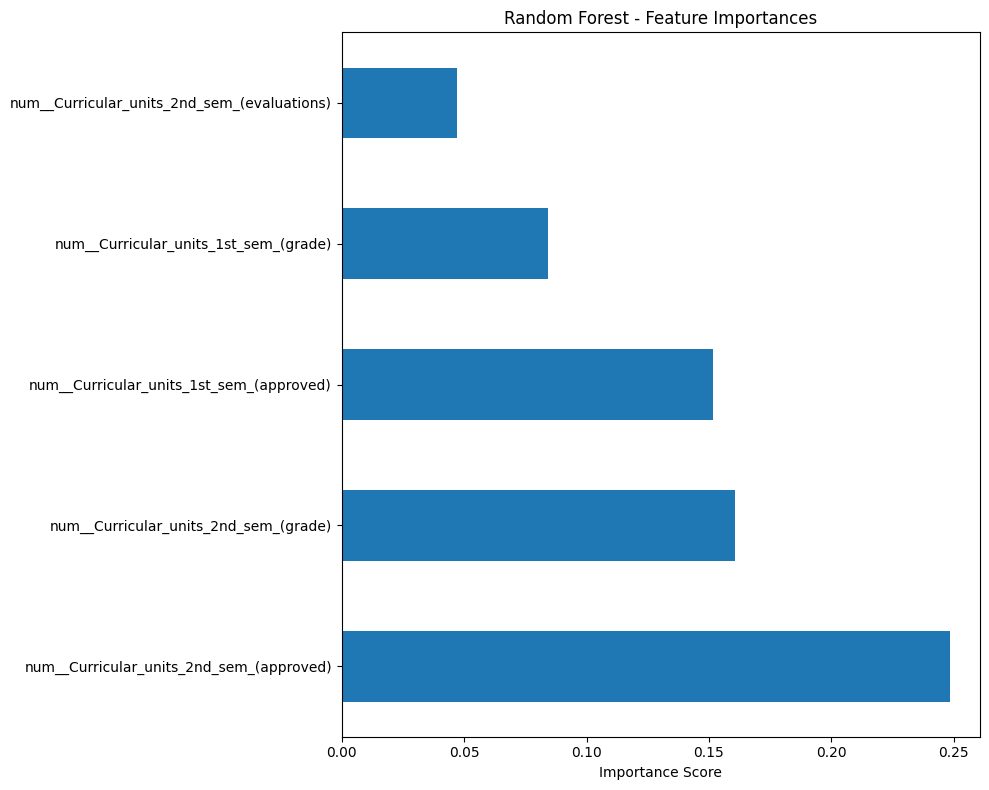

In [20]:
# Extract feature importances from the Random Forest model
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and plot
top5_features = importances_rf.sort_values(ascending=False).head(5)
top5_features.plot(kind="barh", figsize=(10, 8))
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### XGBoost

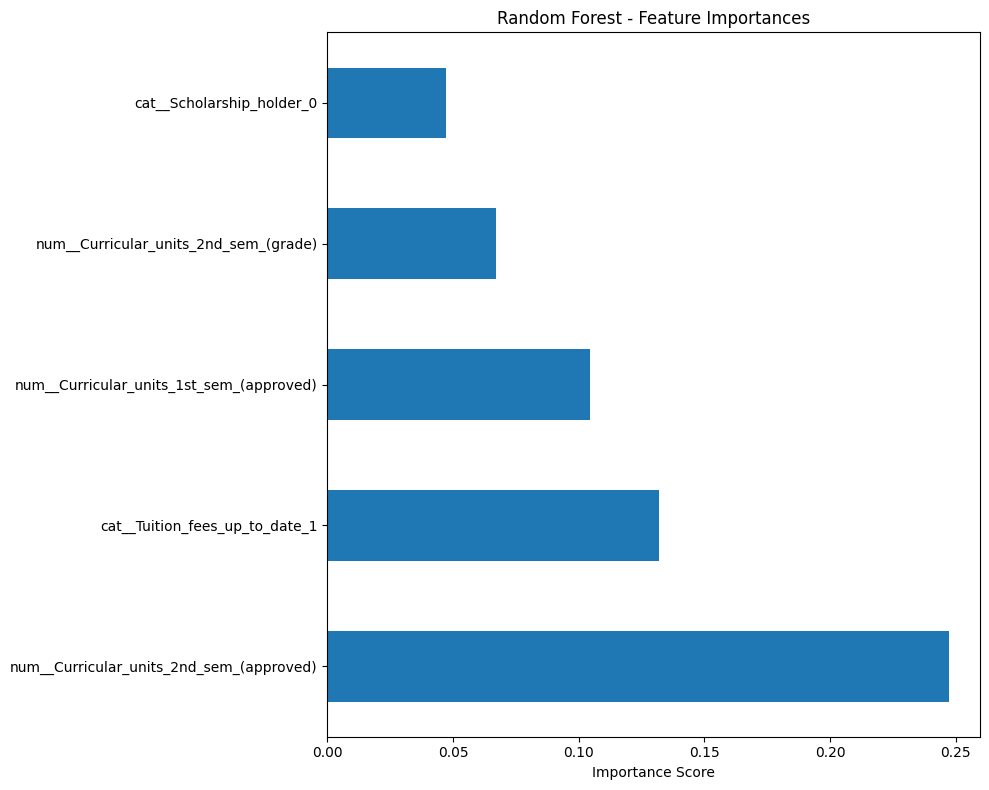

In [21]:
# Extract feature importances from the trained XGBoost model
importances_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Sort and plot
top5_features = importances_xgb.sort_values(ascending=False).head(5)
top5_features.plot(kind="barh", figsize=(10, 8))
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### CatBoost

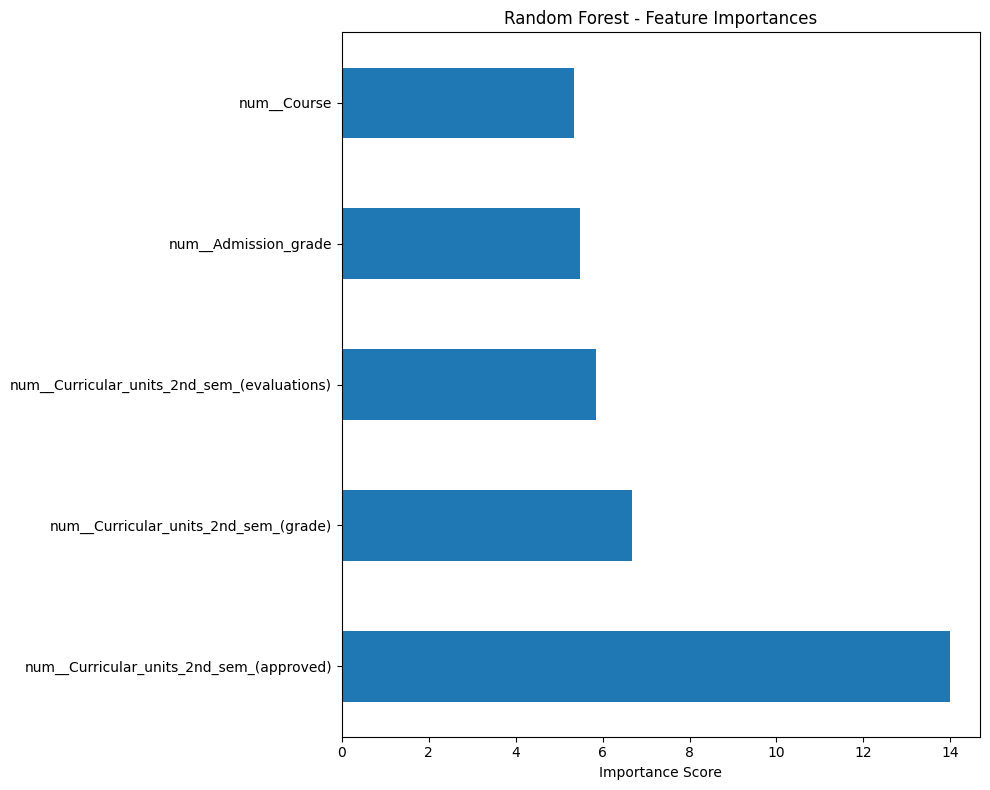

In [22]:
# Extract feature importances from the trained CatBoost model
importances_catb = pd.Series(catb.get_feature_importance(), index=X_train.columns)

# Sort and plot
top5_features = importances_catb.sort_values(ascending=False).head(5)
top5_features.plot(kind="barh", figsize=(10, 8))
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Ensemble Models

### Hard voting

In [23]:
# Ensure 1D arrays
rf_pred   = np.asarray(rf.predict(X_valid)).ravel()
xgb_pred  = np.asarray(xgb.predict(X_valid)).ravel()
catb_pred = np.asarray(catb.predict(X_valid)).ravel()

# Build DF
ensemble_preds = pd.DataFrame({
    'RF': rf_pred,
    'XGBoost': xgb_pred,
    'CatBoost': catb_pred
})

# Majority vote
majority_vote = ensemble_preds.mode(axis=1).iloc[:, 0]

print(f"Majority Voting Accuracy: {accuracy_score(y_valid, majority_vote):.5f}")

Majority Voting Accuracy: 0.83390


### Soft voting

In [24]:
# Predict probabilities
rf_probs = rf.predict_proba(X_valid)
xgb_probs = xgb.predict_proba(X_valid)
catb_probs = catb.predict_proba(X_valid)

# Average probabilities
soft_vote_probs = (rf_probs + xgb_probs + catb_probs) / 3
soft_vote = soft_vote_probs.argmax(axis=1)

# Evaluate
print(f"Soft Voting Accuracy: {accuracy_score(y_valid, soft_vote):.5f}")

Soft Voting Accuracy: 0.83442


# Submission

In [25]:
# Predict on test set
rf_test_pred   = np.asarray(rf.predict(df_test)).ravel()
xgb_test_pred  = np.asarray(xgb.predict(df_test)).ravel()
catb_test_pred = np.asarray(catb.predict(df_test)).ravel()

# Majority vote (hard voting)
ensemble_test = pd.DataFrame({
    "RF": rf_test_pred,
    "XGBoost": xgb_test_pred,
    "CatBoost": catb_test_pred
})
majority_vote_test = ensemble_test.mode(axis=1).iloc[:, 0]

# If you used LabelEncoder `le` on y:
if np.issubdtype(majority_vote_test.dtype, np.number):
    final_test_pred = le.inverse_transform(majority_vote_test.astype(int).to_numpy())
else:
    final_test_pred = majority_vote_test.to_numpy()

# Create submission
sample_submission_df = pd.read_csv("/kaggle/input/academic-dataset/sample_submission.csv")
submission = pd.DataFrame({
    "id": sample_submission_df["id"],
    "Target": final_test_pred
})
submission.to_csv("submission.csv", index=False)
submission.head()


,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
